# HEART FAILURE PREDICTION

# Introduction
Cardiovascular diseases (CVDs) are a leading cause of global mortality, responsible for a substantial number of deaths each year. Heart attacks and strokes account for a significant proportion of these fatalities, particularly affecting individuals below the age of 70. Among the complications arising from CVDs, heart failure is a prevalent condition with significant health implications. To address the challenges posed by CVDs and heart failure, we have access to a comprehensive dataset comprising 11 variables that can potentially assist in predicting the occurrence of heart disease.

Our project focuses on employing exploratory data analysis (EDA) techniques and advanced machine learning models to gain valuable insights from the dataset. Through thorough data exploration and analysis, including assessing distributions, correlations, and risk factors, we aim to uncover key patterns and relationships relevant to heart failure. By uncovering meaningful insights, we can enhance our understanding of the underlying factors contributing to heart disease and inform effective preventive measures.

### Cite
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

### Attribute Information
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

### Aim :
To classify/predict whether a patient is susceptible to heart failure depends on multiple attributes.
This is a binary classification with several numeric and categorical features.


### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
# Read the CSV file and store it in the 'project' DataFrame
project = pd.read_csv('/Users/rizwan/Desktop/untitled folder/heart.csv')

# Display the first few rows of the DataFrame
project.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


# Exploratory Data Analysis

### Data Info :

In [51]:
# Retrieve the shape of the DataFrame
project.shape


(918, 12)

In [52]:
# Retrieve the column names of the DataFrame
project.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [53]:
# Display the concise summary of the DataFrame
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [54]:
# Check for missing values in each column of the DataFrame
project.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- **No null values** present in the data!

In [55]:
# Generate descriptive statistics of the DataFrame
project.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


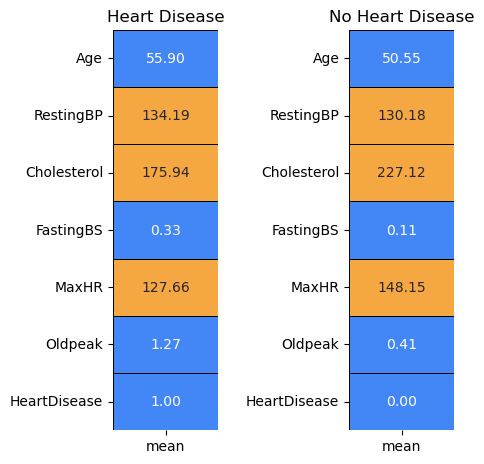

In [8]:
# Compute descriptive statistics for the 'HeartDisease' class equal to 1
yes = project[project['HeartDisease'] == 1].describe().T

# Compute descriptive statistics for the 'HeartDisease' class equal to 0
no = project[project['HeartDisease'] == 0].describe().T

# Define color palette for the heatmaps
colors = ['#4287f5', '#f5a742']  # Blue and orange colors

# Create subplots for side-by-side heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

# Plot heatmap for 'Heart Disease' class
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Heart Disease')

# Plot heatmap for 'No Heart Disease' class
plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Heart Disease')

# Adjust subplot layout
fig.tight_layout(pad=2)


- **Nilai rata-rata** dari semua fitur untuk kasus penyakit jantung dan penyakit non-jantung.

### Dividing features into Numerical and Categorical

In [9]:
# Get the list of column names in the dataset
col = list(project.columns)

# Initialize empty lists for categorical and numerical features
categorical_features = []
numerical_features = []

# Iterate over each column
for i in col:
    # Check if the number of unique values in the column is greater than 6
    if len(project[i].unique()) > 6:
        # If so, consider it as a numerical feature
        numerical_features.append(i)
    else:
        # Otherwise, consider it as a categorical feature
        categorical_features.append(i)

# Print the categorical features
print('Categorical Features:')
print(categorical_features)

# Print the numerical features
print('Numerical Features:')
print(numerical_features)


Categorical Features:
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


Here, categorical features are determined if the attribute has fewer than 6 unique elements, otherwise, it is considered a numerical feature.
A typical approach to feature classification can also be based on the data type of the elements in each attribute.
For example: data type = integer, attribute = numerical feature; data type = string, attribute = categorical feature.

For this dataset, since the number of features is relatively small, we can also manually inspect the dataset to determine the feature types.

### Categorical Features :

In [10]:
# Create a LabelEncoder object
le = LabelEncoder()

# Create a copy of the project dataframe
df1 = project.copy(deep=True)

# Encode the 'Sex' column
df1['Sex'] = le.fit_transform(df1['Sex'])

# Encode the 'ChestPainType' column
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])

# Encode the 'RestingECG' column
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])

# Encode the 'ExerciseAngina' column
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])

# Encode the 'ST_Slope' column
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])


-Create a deep copy of the original dataset and label encode the categorical feature data.

-Modifications made to the original dataset will not be reflected in this deep copy.

-Therefore, we use this deep copy dataset that has all the features converted to numerical values for visualization and modeling purposes.

#### Distribution of Categorical Features :

Text(0.5, 1.0, 'Distribution: HeartDisease')

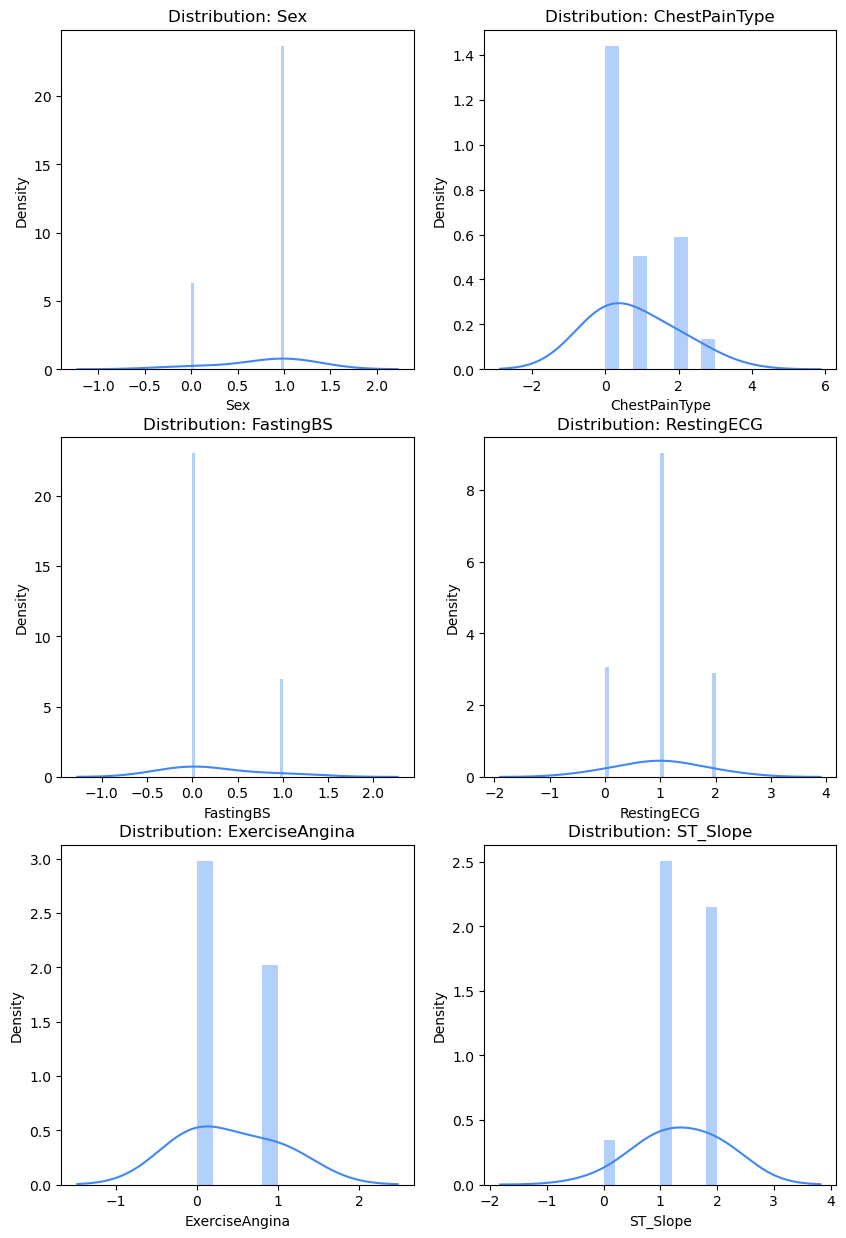

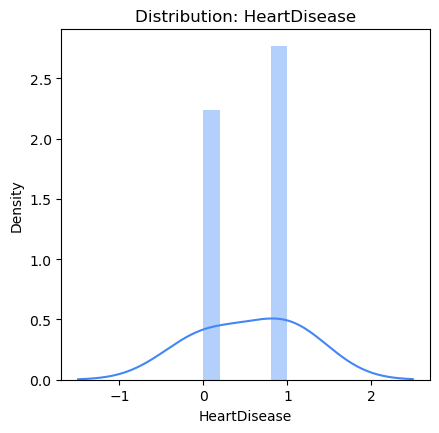

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Define color for the plots
color = '#4287f5'  # Blue color

# Plot the distributions of categorical features
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    sns.distplot(df1[categorical_features[i]], kde_kws={'bw': 1}, color=color)
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)

# Plot the distribution of the last categorical feature separately
plt.figure(figsize=(4.75, 4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]], kde_kws={'bw': 1}, color=color)
title = 'Distribution: ' + categorical_features[len(categorical_features) - 1]
plt.title(title)


##### All categorical features are approximately Normally Distributed.





### Numerical Features :

#### Distribution of Numerical Features :

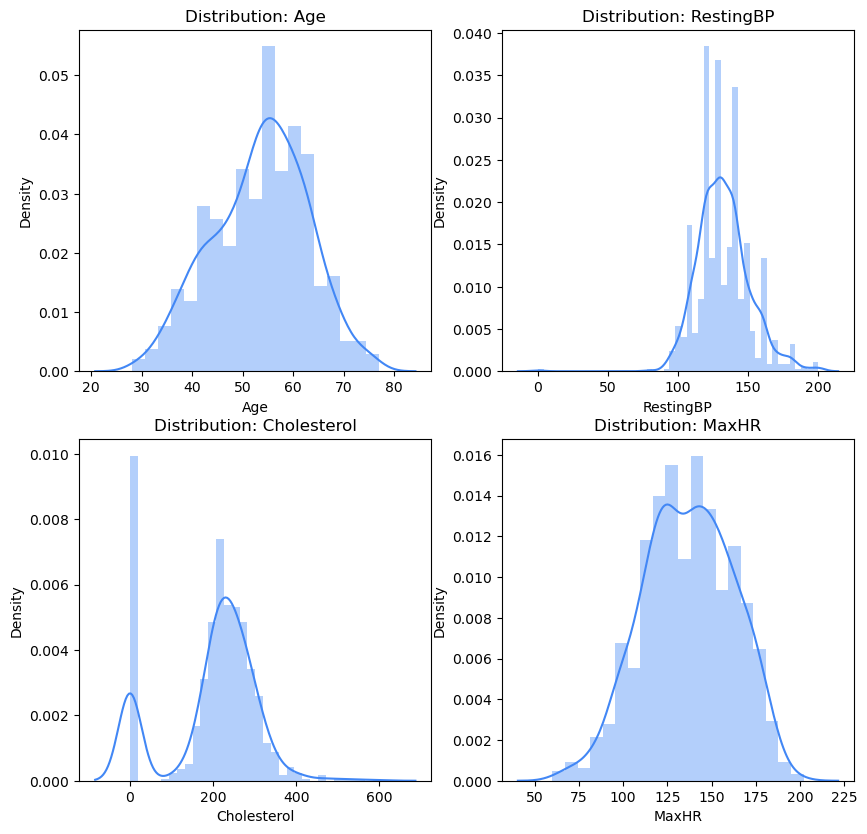

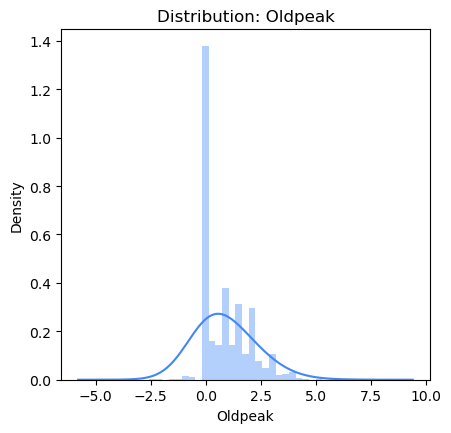

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 9.75))

# Plot the distributions of numerical features
for i in range(len(numerical_features) - 1):
    plt.subplot(2, 2, i+1)
    sns.distplot(project[numerical_features[i]], color='#4287f5')  # Deep pink color
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)

# Plot the distribution of the last numerical feature separately
plt.figure(figsize=(4.75, 4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]], kde_kws={'bw': 1}, color='#4287f5')  # Deep pink color
title = 'Distribution: ' + numerical_features[len(numerical_features) - 1]
plt.title(title)

plt.show()


- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution. 

### Target Variable Visualization (HeartDisease) : 

The dataset is fairly balanced!


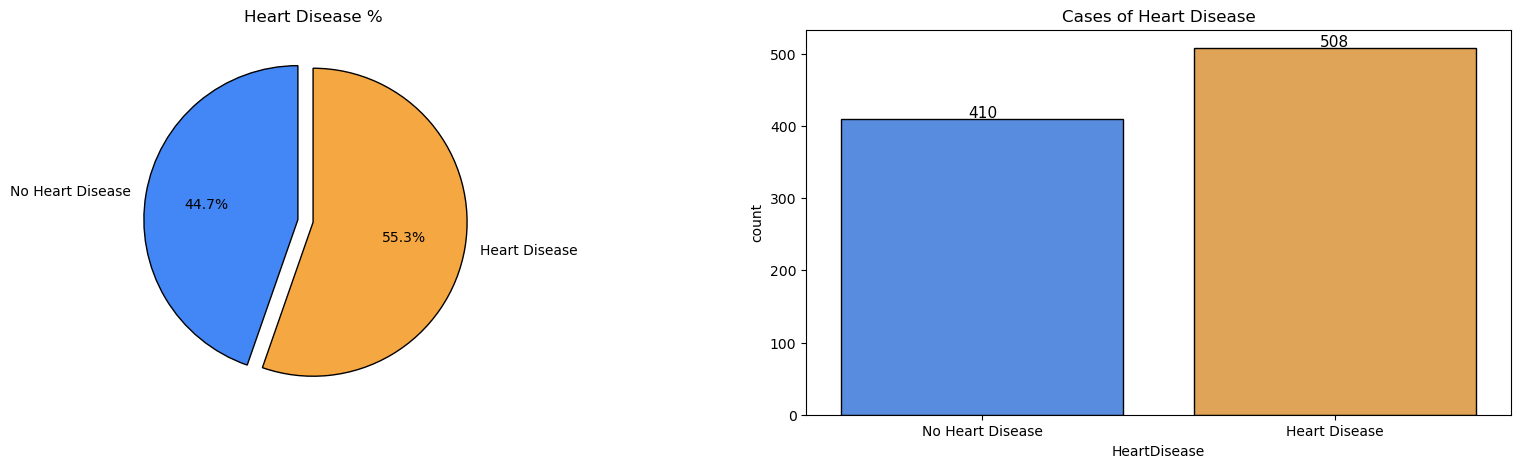

In [13]:
# Calculate the count of heart disease cases and store them in a list
l = list(project['HeartDisease'].value_counts())

# Calculate the percentage of heart disease cases and no heart disease cases
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plotting the pie chart showing the percentage of heart disease cases
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

# Plotting the count of heart disease cases using a bar plot
plt.subplot(1, 2, 2)
ax = sns.countplot('HeartDisease', data=project, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center',
            fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

# Display the plots
plt.show()


### Categorical Features vs Target Variable (HeartDisease) :

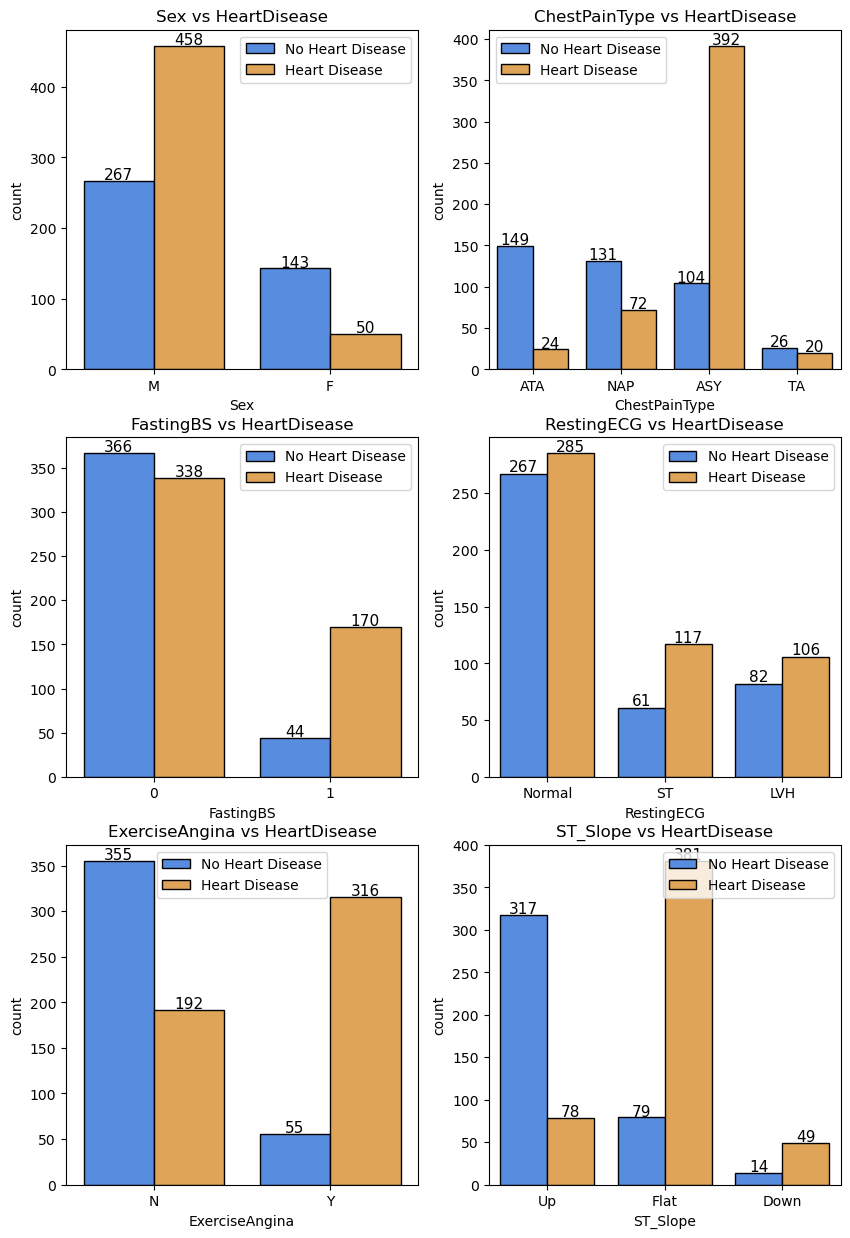

In [14]:
# Create a figure with subplots to display categorical feature countplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Iterate through each categorical feature (except the last one)
for i in range(len(categorical_features) - 1):
    # Create a subplot for each categorical feature
    plt.subplot(3, 2, i + 1)
    
    # Plot a countplot for the current categorical feature, grouped by "HeartDisease"
    ax = sns.countplot(categorical_features[i], data=project, hue="HeartDisease", palette=colors, edgecolor='black')
    
    # Add value labels on top of each bar in the countplot
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    
    # Set the title for the subplot
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

# Display the subplots
plt.show()



The male population shows a higher prevalence of heart disease patients compared to non-heart disease patients. However, among females, the number of heart disease patients is lower than the number of non-heart disease patients.
The presence of the "ASY" type of chest pain is strongly indicative of a higher risk of heart disease.
The relationship between fasting blood sugar and heart disease is intricate. Both high and normal fasting blood sugar levels are associated with a significant number of heart disease cases.
The RestingECG feature does not exhibit a distinct pattern that clearly distinguishes between heart disease and non-heart disease patients. All three categories show a considerable number of heart disease cases.
The presence of exercise-induced angina indicates an increased likelihood of being diagnosed with heart disease.
Among the ST_Slope values, a "flat" slope shows a very high probability of being diagnosed with heart disease. The "down" slope also suggests a similar outcome, although it is observed in fewer data points.







### Categorical Features vs Positive Heart Disease Cases :

In [15]:
# Calculate the percentage distribution of 'Sex' among patients with heart disease
sex = project[project['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

# Calculate the percentage distribution of 'ChestPainType' among patients with heart disease
cp = project[project['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100, cp[1] / sum(cp) * 100, cp[2] / sum(cp) * 100, cp[3] / sum(cp) * 100]

# Calculate the percentage distribution of 'FastingBS' among patients with heart disease
fbs = project[project['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100, fbs[1] / sum(fbs) * 100]

# Calculate the percentage distribution of 'RestingECG' among patients with heart disease
restecg = project[project['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100, restecg[1] / sum(restecg) * 100, restecg[2] / sum(restecg) * 100]

# Calculate the percentage distribution of 'ExerciseAngina' among patients with heart disease
exang = project[project['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100, exang[1] / sum(exang) * 100]

# Calculate the percentage distribution of 'ST_Slope' among patients with heart disease
slope = project[project['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100, slope[1] / sum(slope) * 100, slope[2] / sum(slope) * 100]


Text(0.5, 1.0, 'ST_Slope')

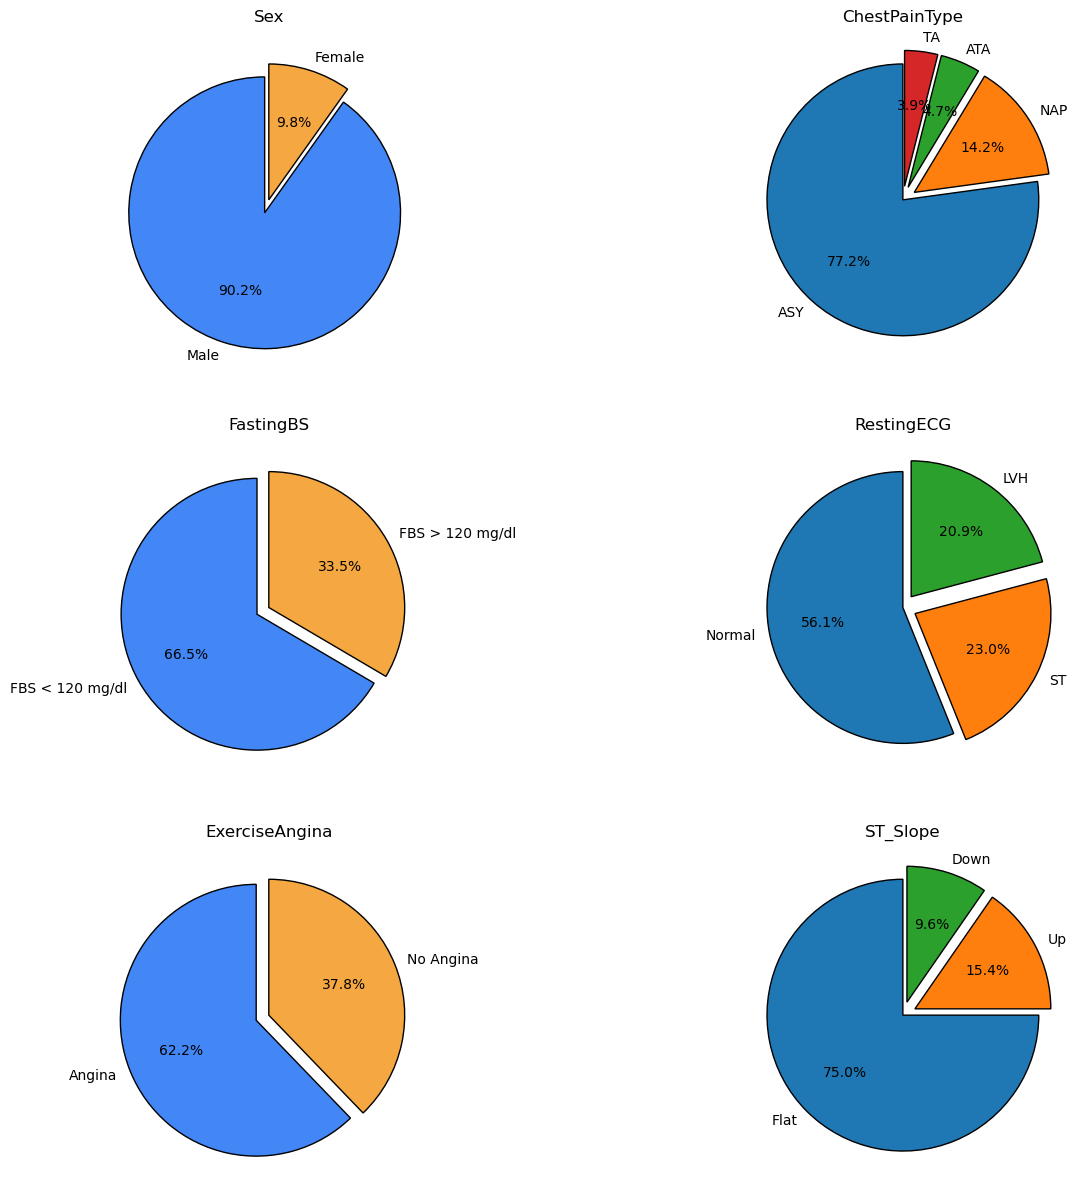

In [16]:
# Create a subplot grid with 4 rows and 2 columns
ax, fig = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot the pie chart for 'Sex' distribution
plt.subplot(3, 2, 1)
plt.pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Sex')

# Plot the pie chart for 'ChestPainType' distribution
plt.subplot(3, 2, 2)
plt.pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ChestPainType')

# Plot the pie chart for 'FastingBS' distribution
plt.subplot(3, 2, 3)
plt.pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('FastingBS')

# Plot the pie chart for 'RestingECG' distribution
plt.subplot(3, 2, 4)
plt.pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('RestingECG')

# Plot the pie chart for 'ExerciseAngina' distribution
plt.subplot(3, 2, 5)
plt.pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ExerciseAngina')

# Plot the pie chart for 'ST_Slope' distribution
plt.subplot(3, 2, 6)
plt.pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ST_Slope')


Among all the patients diagnosed with heart disease, an overwhelming majority of 90% are male.

The type of chest pain known as "ASY" is associated with a significant 77% of heart disease cases.

Having a fasting blood sugar level below 120 mg/dl is indicative of a higher likelihood of heart disease.

Among the different levels of RestingECG, the "Normal" level is associated with a 56% higher chance of heart disease compared to the "LVH" and "ST" levels.

The presence of exercise-induced angina is also an indication of potential heart diseases.

In terms of ST_Slope readings, the "Flat" level represents a substantial portion of 75% and can be useful in detecting underlying heart problems.

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :

#### Sex vs Numerical Features :

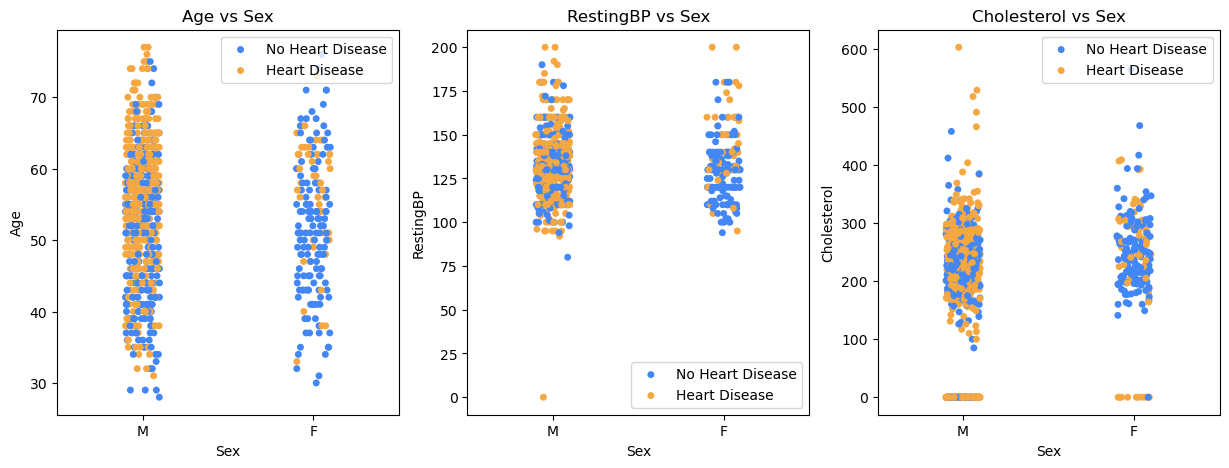

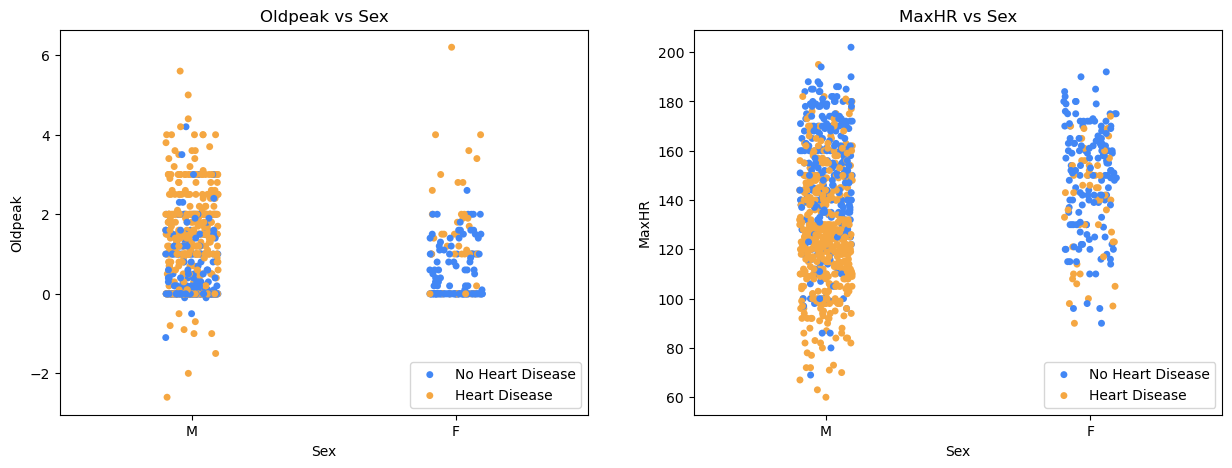

In [17]:
# Create subplots with 1 row and 3 columns for the first set of plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over the first 3 numerical features
for i in range(3):
    # Set the subplot position
    plt.subplot(1, 3, i+1)
    
    # Create a strip plot of the current numerical feature against 'Sex', with 'HeartDisease' as hue
    sns.stripplot(x='Sex', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title)

# Create subplots with 1 row and 2 columns for the second set of plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterate over the last 2 numerical features in reverse order
for i in [-1, -2]:
    # Set the subplot position
    plt.subplot(1, 2, -i)
    
    # Create a strip plot of the current numerical feature against 'Sex', with 'HeartDisease' as hue
    sns.stripplot(x='Sex', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title)


- **Male** population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- **Female** population data points are very less as compared to **male** population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases. 

#### ChestPainType vs Numerical Features :

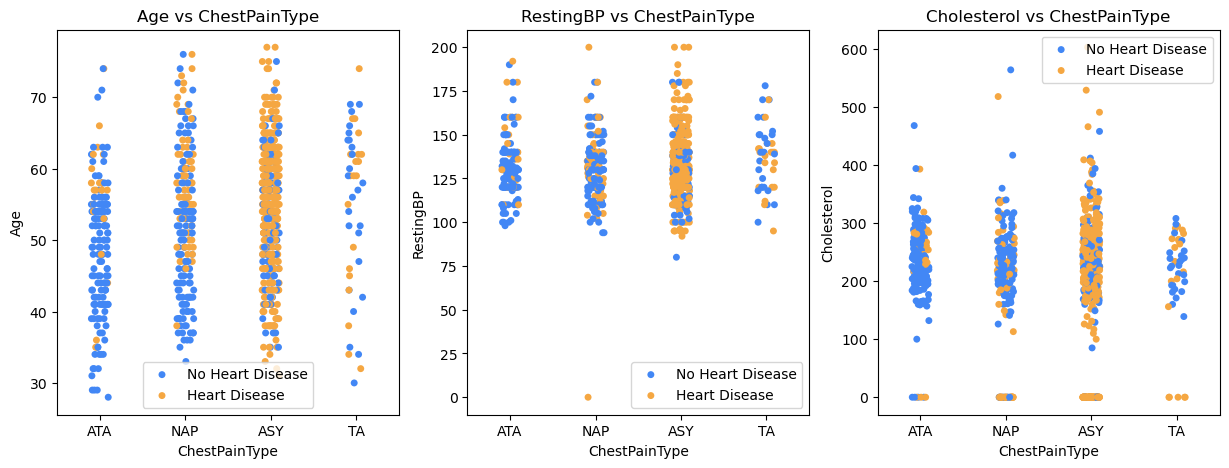

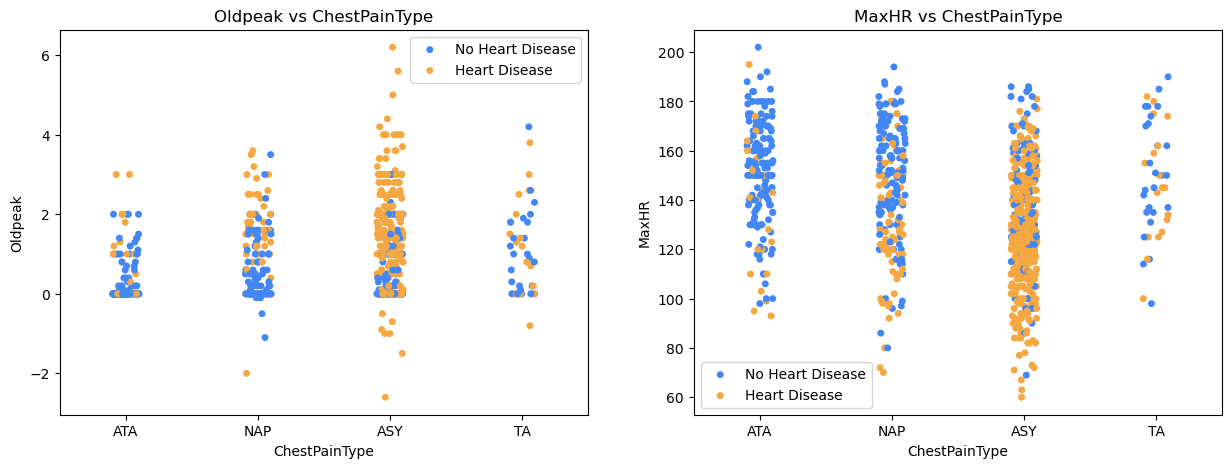

In [18]:
# Create subplots with 1 row and 3 columns for the first set of plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over the first 3 numerical features
for i in range(3):
    # Set the subplot position
    plt.subplot(1, 3, i+1)
    
    # Create a strip plot of the current numerical feature against 'ChestPainType', with 'HeartDisease' as hue
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)

# Create subplots with 1 row and 2 columns for the second set of plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterate over the last 2 numerical features in reverse order
for i in [-1, -2]:
    # Set the subplot position
    plt.subplot(1, 2, -i)
    
    # Create a strip plot of the current numerical feature against 'ChestPainType', with 'HeartDisease' as hue
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title)


- **ASY** type of chest pain dominates other types of chest pain in all the numerical features by a lot.

#### FastingBS vs Numerical features :

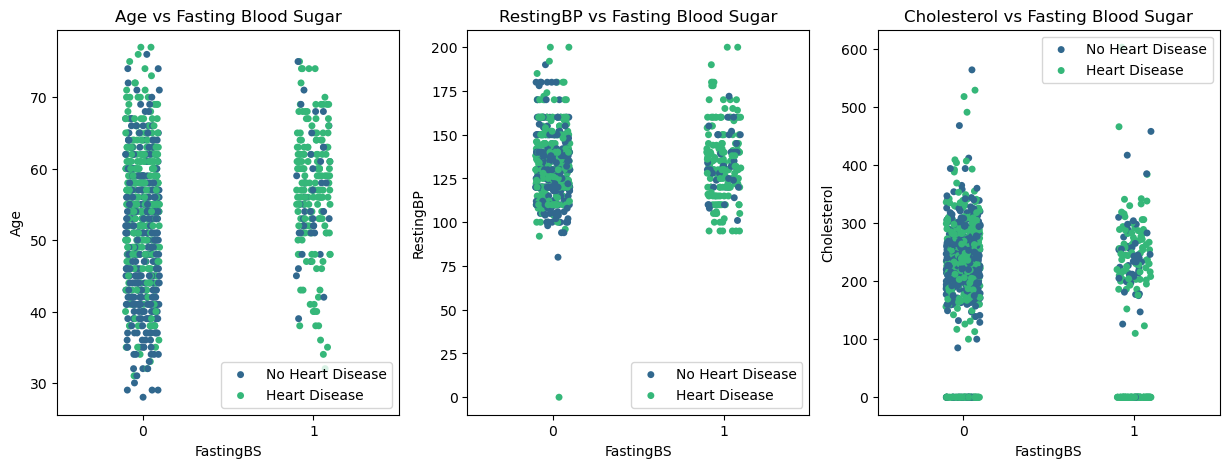

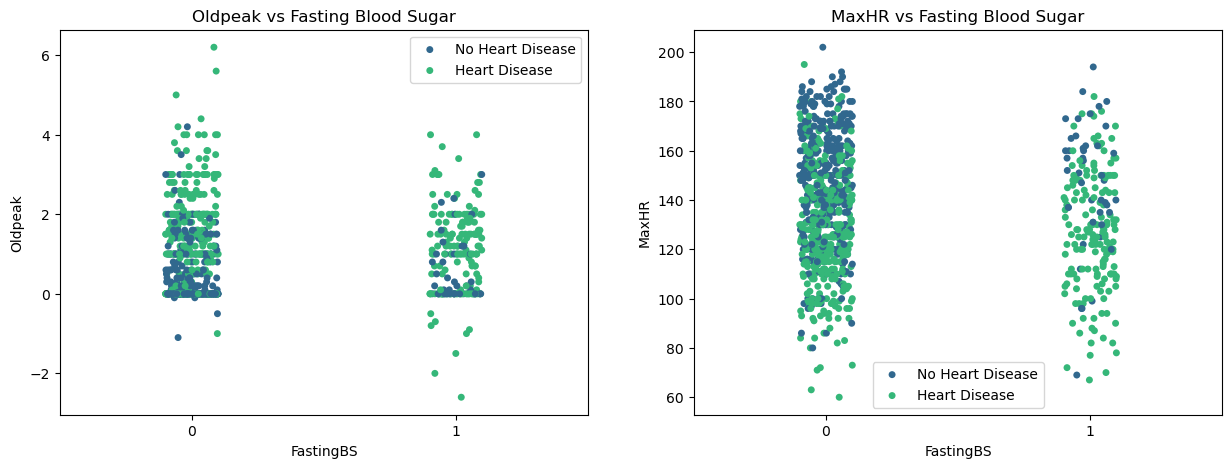

In [19]:
# Create subplots with 1 row and 3 columns for the first set of plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over the first 3 numerical features
for i in range(3):
    # Set the subplot position
    plt.subplot(1, 3, i+1)
    
    # Create a strip plot of the current numerical feature against 'FastingBS', with 'HeartDisease' as hue
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=project, hue='HeartDisease', palette='viridis')
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title)

# Create subplots with 1 row and 2 columns for the second set of plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterate over the last 2 numerical features in reverse order
for i in [-1, -2]:
    # Set the subplot position
    plt.subplot(1, 2, -i)
    
    # Create a strip plot of the current numerical feature against 'FastingBS', with 'HeartDisease' as hue
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=project, hue='HeartDisease', palette='viridis')
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title)


Heart diseases are consistently observed in individuals aged 50 and above, regardless of their Fasting Blood Sugar status. Among individuals with Fasting Blood Sugar, those with Resting BP over 100 exhibit a higher incidence of heart diseases compared to those without Fasting Blood Sugar. The association between Cholesterol and Fasting Blood Sugar does not appear to significantly contribute to understanding the occurrence of heart diseases. However, individuals who test negative for Fasting Blood Sugar but have a maximum heart rate below 130 are more susceptible to heart diseases. These findings emphasize the intricate interplay of age, Fasting Blood Sugar, Resting BP, Cholesterol, and maximum heart rate in relation to the risk of developing heart diseases.

#### RestingECG vs Numerical Features :

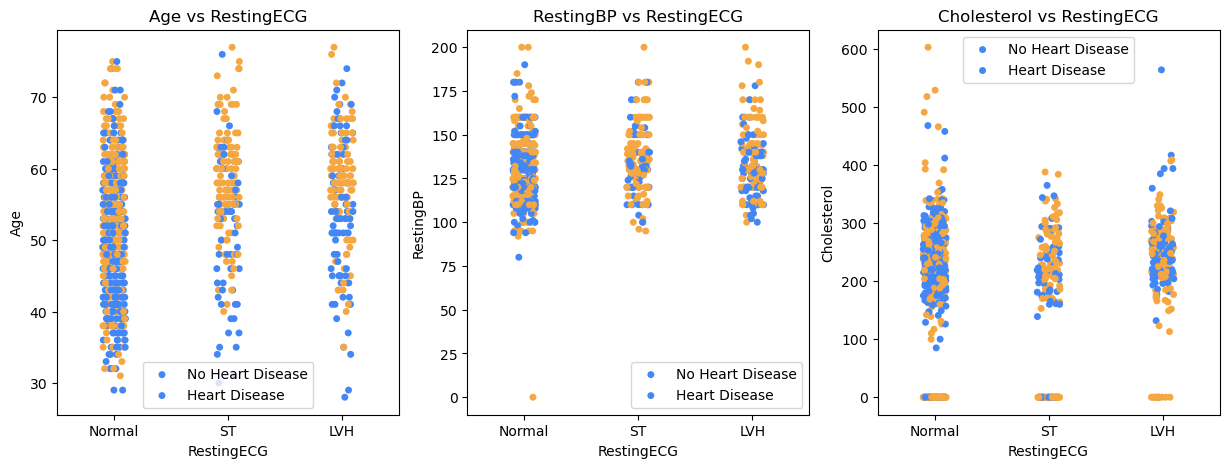

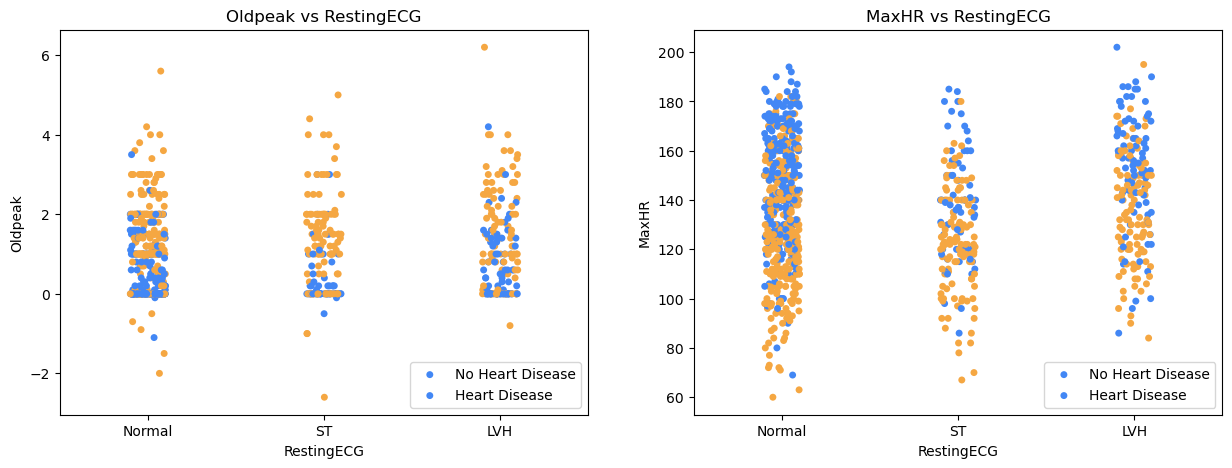

In [20]:
# Create subplots with 1 row and 3 columns for the first set of plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over the first 3 numerical features
for i in range(3):
    # Set the subplot position
    plt.subplot(1, 3, i+1)
    
    # Create a strip plot of the current numerical feature against 'RestingECG', with 'HeartDisease' as hue
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title)

# Create subplots with 1 row and 2 columns for the second set of plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterate over the last 2 numerical features in reverse order
for i in [-1, -2]:
    # Set the subplot position
    plt.subplot(1, 2, -i)
    
    # Create a strip plot of the current numerical feature against 'RestingECG', with 'HeartDisease' as hue
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title)


Heart diseases tend to be detected in individuals with RestingECG values of Normal, ST, and LVH starting from the age of 30, 40, and 40, respectively. However, the risk of heart disease significantly increases for patients above the age of 50, regardless of their RestingECG values. Interestingly, heart diseases are observed across all ranges of RestingBP and RestingECG values, indicating that these factors alone may not be strong predictors of heart disease. A noteworthy pattern emerges when examining Cholesterol values between 200 and 300, particularly in conjunction with an ST value of RestingECG, where a cluster of patients with heart diseases is observed. Furthermore, dense concentrations of heart disease cases are found at maximum Heart Rate values below 140, particularly when combined with a Normal RestingECG. The presence of ST and LVH values throughout the range of maximum Heart Rate also indicates a higher likelihood of heart diseases. These observations provide valuable insights into the interplay between various factors and the detection of heart diseases, emphasizing the importance of considering multiple variables in assessing the risk of cardiovascular conditions.

#### ExerciseAngina vs Numerical Features :

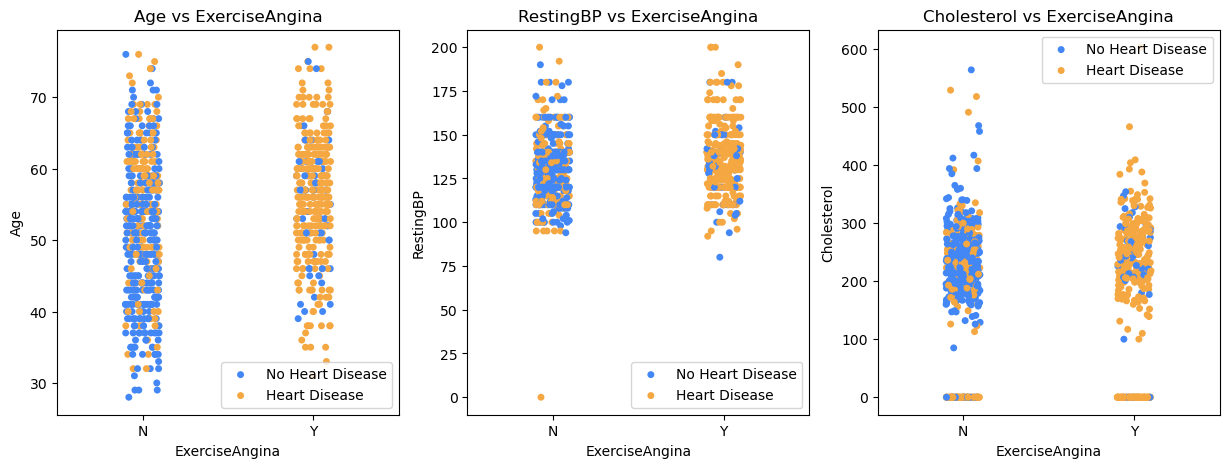

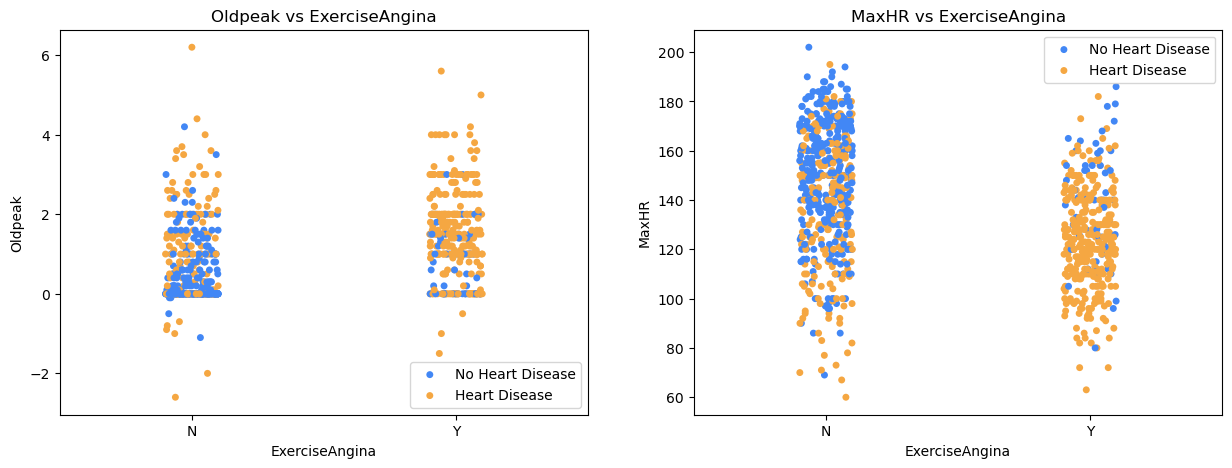

In [21]:
# Create subplots with 1 row and 3 columns for the first set of plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over the first 3 numerical features
for i in range(3):
    # Set the subplot position
    plt.subplot(1, 3, i+1)
    
    # Create a strip plot of the current numerical feature against 'ExerciseAngina', with 'HeartDisease' as hue
    sns.stripplot(x='ExerciseAngina', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title)

# Create subplots with 1 row and 2 columns for the second set of plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterate over the last 2 numerical features in reverse order
for i in [-1, -2]:
    # Set the subplot position
    plt.subplot(1, 2, -i)
    
    # Create a strip plot of the current numerical feature against 'ExerciseAngina', with 'HeartDisease' as hue
    sns.stripplot(x='ExerciseAngina', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title)


- A crsytal clear observation can be made about the relationship between **heart disease** case and **Exercise induced Angina**. A positive correlation between the 2 features can be concluded throughout all the numerical features. 

#### ST_Slope vs Numerical Features :

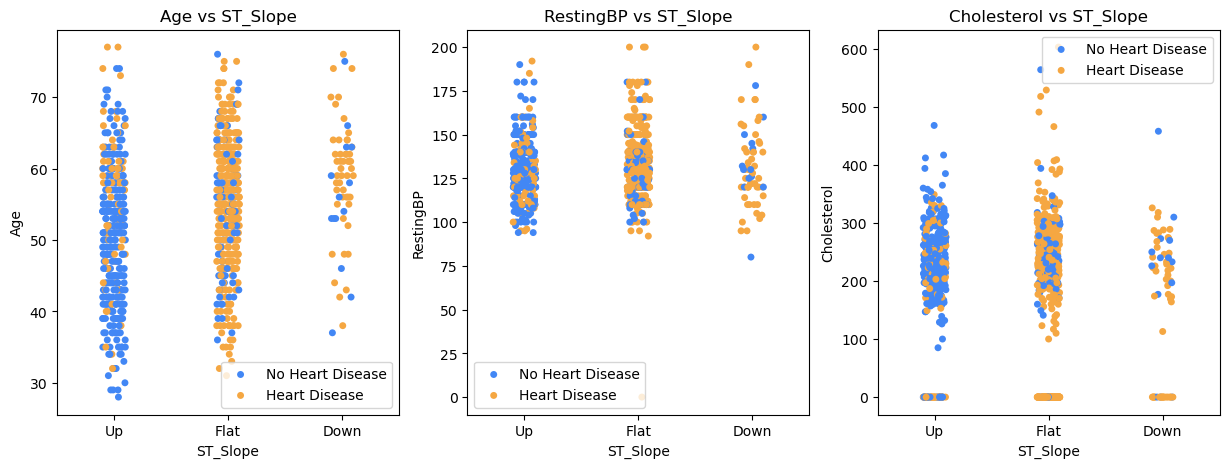

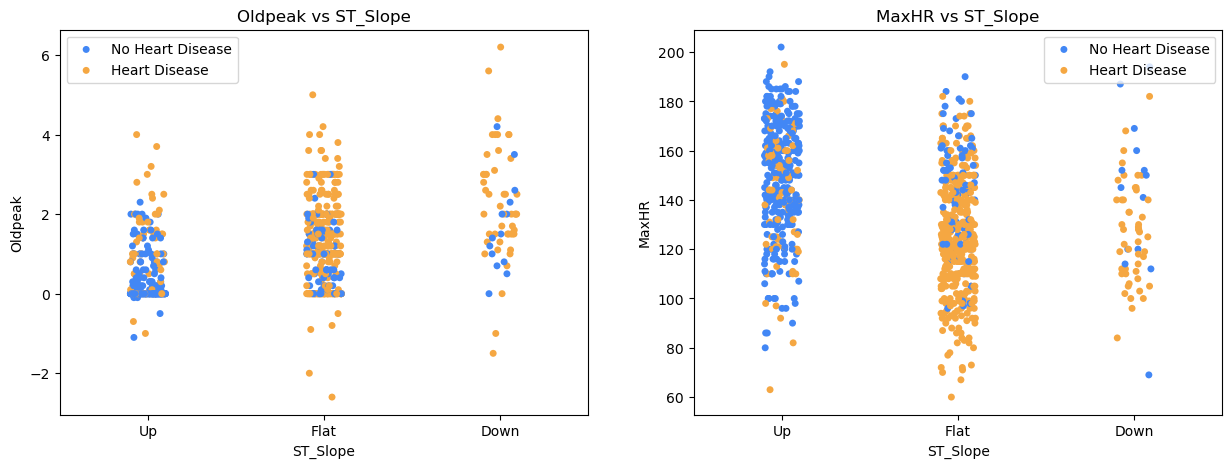

In [22]:
# Create subplots with 1 row and 3 columns for the first set of plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over the first 3 numerical features
for i in range(3):
    # Set the subplot position
    plt.subplot(1, 3, i+1)
    
    # Create a strip plot of the current numerical feature against 'ST_Slope', with 'HeartDisease' as hue
    sns.stripplot(x='ST_Slope', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title)

# Create subplots with 1 row and 2 columns for the second set of plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterate over the last 2 numerical features in reverse order
for i in [-1, -2]:
    # Set the subplot position
    plt.subplot(1, 2, -i)
    
    # Create a strip plot of the current numerical feature against 'ST_Slope', with 'HeartDisease' as hue
    sns.stripplot(x='ST_Slope', y=numerical_features[i], data=project, hue='HeartDisease', palette=colors)
    
    # Add a legend to the plot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    
    # Set the title for the plot
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title)


There is a strong positive correlation between the value of ST_Slope and the presence of heart disease.

In terms of the likelihood of being diagnosed with heart disease, the order from highest to lowest probability is Flat, Down, and Up.

The analysis of the order and values of features for positive cases of heart disease reveals compelling patterns and insights. It becomes evident that certain factors play a significant role in indicating the presence of heart disease. Gender disparities emerge, with males exhibiting a higher susceptibility to heart disease compared to females. The type of chest pain follows a specific order, with ASY (asymptomatic) chest pain carrying the highest likelihood of heart disease, followed by NAP (non-anginal pain), ATA (atypical angina), and TA (typical angina). Fasting blood sugar levels also exhibit a notable influence, as lower levels (<120 mg/dl) correspond to a higher prevalence of heart disease. Analyzing the resting electrocardiogram (ECG) readings reveals that individuals with a normal ECG have a greater likelihood of being diagnosed with heart disease, while those with ST abnormalities and left ventricular hypertrophy (LVH) also show an increased risk. The presence of exercise-induced angina further signifies an elevated probability of heart disease. Examining the numerical features, age emerges as a prominent factor, with individuals aged 50 and above facing a higher vulnerability. Additionally, specific ranges for resting blood pressure, cholesterol levels, maximum heart rate, and ST depression (Oldpeak) are associated with positive heart disease cases. These valuable insights shed light on the risk factors associated with heart disease and offer potential guidance for the development of accurate predictive models.

# Feature Engineering

### Data Scaling :

In [23]:
# Create instances of MinMaxScaler and StandardScaler
mms = MinMaxScaler()  # For normalization
ss = StandardScaler()  # For standardization

# Apply MinMaxScaler to the 'Oldpeak' column and update the values in the 'df1' DataFrame
df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])

# Apply StandardScaler to the 'Age' column and update the values in the 'df1' DataFrame
df1['Age'] = ss.fit_transform(df1[['Age']])

# Apply StandardScaler to the 'RestingBP' column and update the values in the 'df1' DataFrame
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])

# Apply StandardScaler to the 'Cholesterol' column and update the values in the 'df1' DataFrame
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])

# Apply StandardScaler to the 'MaxHR' column and update the values in the 'df1' DataFrame
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])

# Display the first few rows of the updated 'df1' DataFrame
df1.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


Machine learning models do not have inherent knowledge of the units or the true meaning of the feature values. They treat the input as numerical values without understanding the underlying context. Therefore, it is important to scale the data.

For example, the features Age (measured in years) and FastingBS (measured in mg/dl) have different units. To ensure fair comparison and accurate modeling, we need to scale the data.

There are two common options for data scaling: 1) Normalization and 2) Standardization.

Normalization is applied to features that do not follow a normal (Gaussian) distribution. In this case, the Oldpeak feature, which displayed a right-skewed distribution, is normalized.

Standardization, on the other hand, is performed on features that are normally distributed but may have values that are significantly larger or smaller than other features. In our case, the features Age, RestingBP, Cholesterol, and MaxHR are standardized to ensure consistent scaling across all features.








### Correlation Matrix :

<AxesSubplot:>

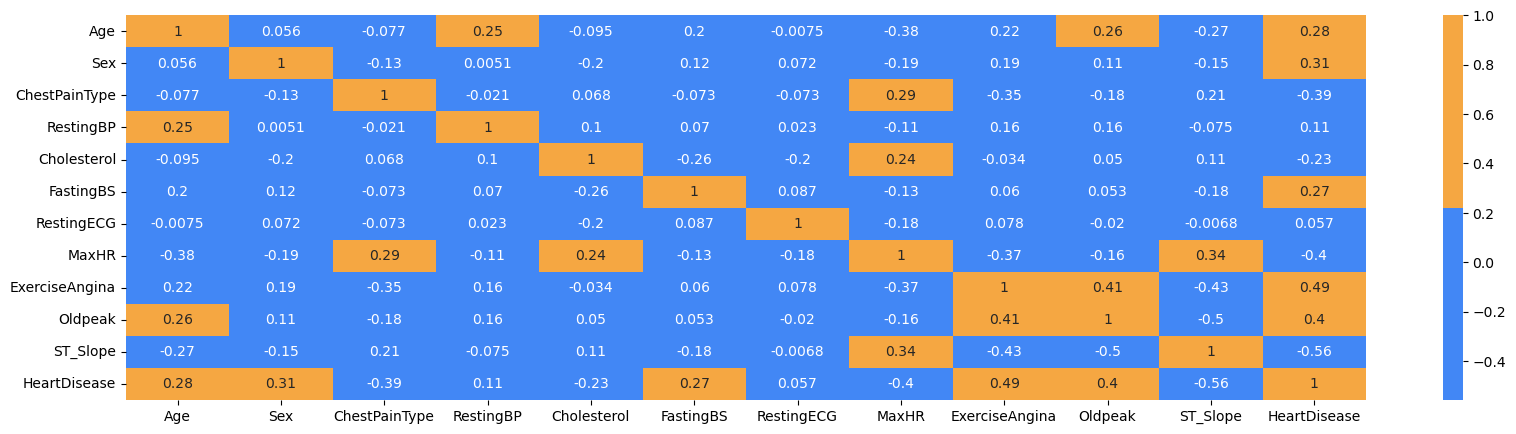

In [24]:
# Set the figure size for the heatmap
plt.figure(figsize=(20, 5))

# Create a heatmap of the correlation matrix of 'df1'
sns.heatmap(df1.corr(), cmap=colors, annot=True)

# Add color mapping using the 'colors' palette
# Display correlation values as annotations on the heatmap

- It is a huge matrix with too many features. We will check the correlation only with respect to **HeartDisease**. 

<AxesSubplot:>

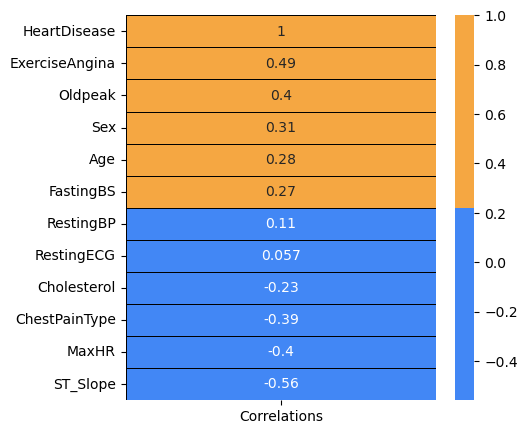

In [25]:
# Calculate the correlation between each column in 'df1' and the 'HeartDisease' column
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()

# Set the column name of the correlation DataFrame as 'Correlations'
corr.columns = ['Correlations']

# Create subplots with a size of (5, 5)
plt.subplots(figsize=(5, 5))

# Create a heatmap of the correlation DataFrame
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')


- Except for **RestingBP** and **RestingECG**, everyone displays a positive or negative relationship with **HeartDisease**.

### Feature Selection for Categorical Features :

#### Chi Squared Test :

<AxesSubplot:>

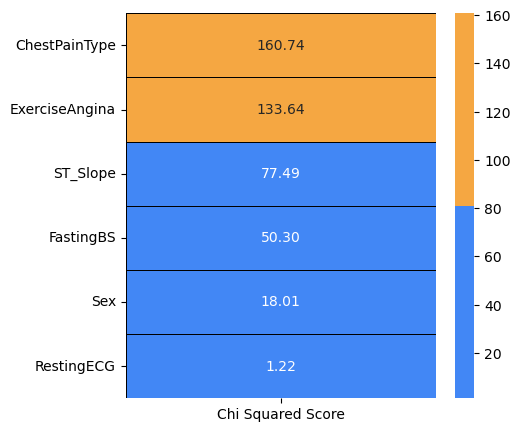

In [26]:
# Select the categorical features from the 'df1' DataFrame
features = df1.loc[:, categorical_features[:-1]]

# Select the target variable from the 'df1' DataFrame
target = df1.loc[:, categorical_features[-1]]

# Initialize the SelectKBest object with chi2 as the scoring function and 'all' as the number of features to select
best_features = SelectKBest(score_func=chi2, k='all')

# Fit the SelectKBest object to the features and target variables
fit = best_features.fit(features, target)

# Create a DataFrame to store the chi-squared scores of the features
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

# Create subplots with a size of (5, 5)
plt.subplots(figsize=(5, 5))

# Create a heatmap of the featureScores DataFrame
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')


- Except **RestingECG**, all the remaining categorical features are pretty important for predicting heart diseases.

### Feature Selection for Numerical Features :

#### ANOVA Test :

<AxesSubplot:>

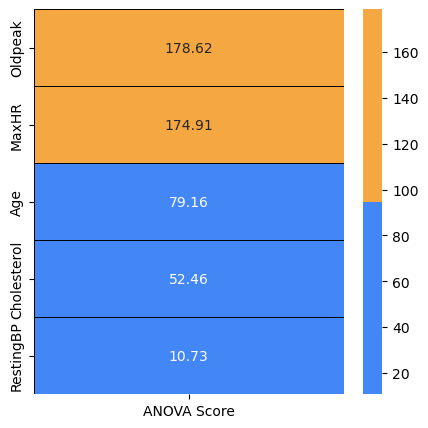

In [27]:
# Select the numerical features from the 'df1' DataFrame
features = df1.loc[:, numerical_features]

# Select the target variable from the 'df1' DataFrame
target = df1.loc[:, categorical_features[-1]]

# Initialize the SelectKBest object with f_classif as the scoring function and 'all' as the number of features to select
best_features = SelectKBest(score_func=f_classif, k='all')

# Fit the SelectKBest object to the features and target variables
fit = best_features.fit(features, target)

# Create a DataFrame to store the ANOVA scores of the features
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Create subplots with a size of (5, 5)
plt.subplots(figsize=(5, 5))

# Create a heatmap of the featureScores DataFrame
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')



- We will leave out **RestingBP** from the modeling part and take the remaining features.

# Modeling


In [28]:
# Select the features by dropping the 'HeartDisease', 'RestingBP', and 'RestingECG' columns from the 'df1' DataFrame
features = df1[df1.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values

# Select the target variable ('HeartDisease') from the 'df1' DataFrame
target = df1['HeartDisease'].values

# Split the data into training and testing sets
# The features and target arrays are split into x_train, x_test, y_train, and y_test respectively
# The test_size parameter specifies the proportion of the data that should be allocated to the test set (here, 20%)
# The random_state parameter is used to ensure reproducibility of the random shuffling of the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)


Selecting the features from the above conducted tests and splitting the data 

In [29]:
def model(classifier):
    """
    This function evaluates a given classifier model by fitting it on the training data, making predictions on the
    testing data, and providing evaluation metrics and visualization.
    
    Args:
    - classifier: A classifier model object
    
    Returns: None
    """

    # Fit the classifier on the training data
    classifier.fit(x_train, y_train)
    
    # Make predictions on the testing data
    prediction = classifier.predict(x_test)
    
    # Perform cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Print accuracy score
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    
    # Print cross-validation score using roc_auc as the scoring metric
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    
    # Print ROC_AUC score
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # Plot ROC curve
    plot_roc_curve(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def model_evaluation(classifier):
    """
    This function evaluates a given classifier model by generating a confusion matrix, displaying it using a heatmap,
    and printing a classification report.
    
    Args:
    - classifier: A classifier model object
    
    Returns: None
    """
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    
    # Define labels for confusion matrix
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    # Display confusion matrix using a heatmap
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    # Print classification report
    print(classification_report(y_test, classifier.predict(x_test)))


#### 1] Logistic Regression :

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# Create a logistic regression classifier object with specified parameters
classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2')


Accuracy: 87.50%
Cross Validation Score: 91.12%
ROC_AUC Score: 87.43%


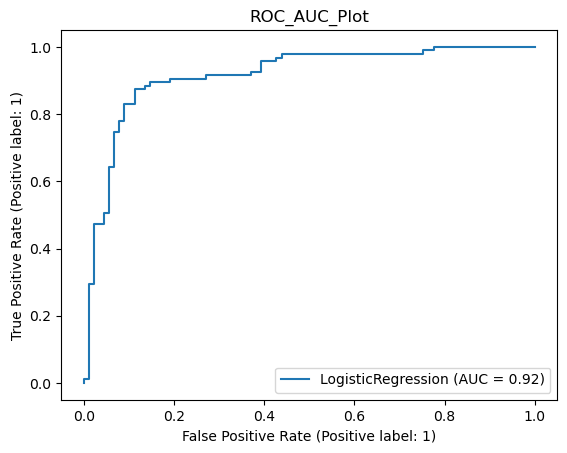

In [32]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



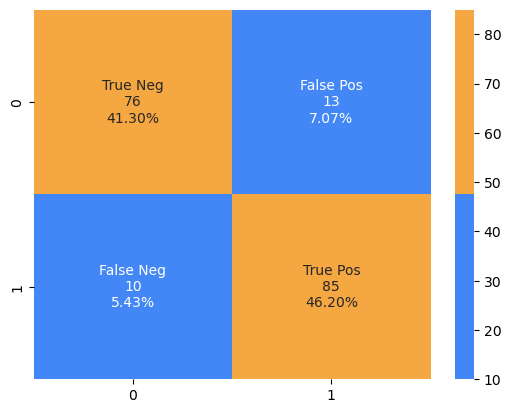

In [33]:
model_evaluation(classifier_lr)

#### 2] Support Vector Classifier :

In [34]:
from sklearn.svm import SVC

In [35]:
# Create a support vector classifier object with specified parameters
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy: 87.50%
Cross Validation Score: 90.53%
ROC_AUC Score: 87.43%


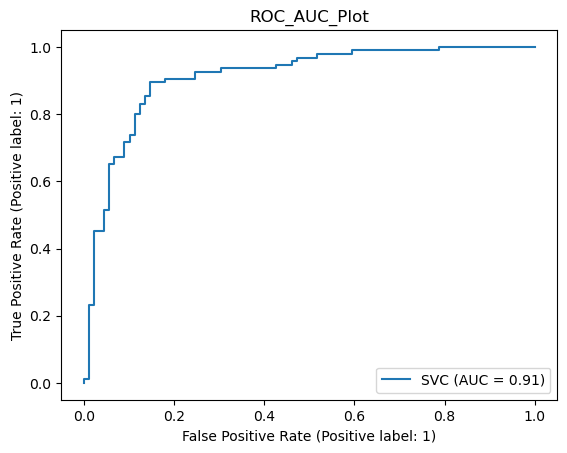

In [36]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



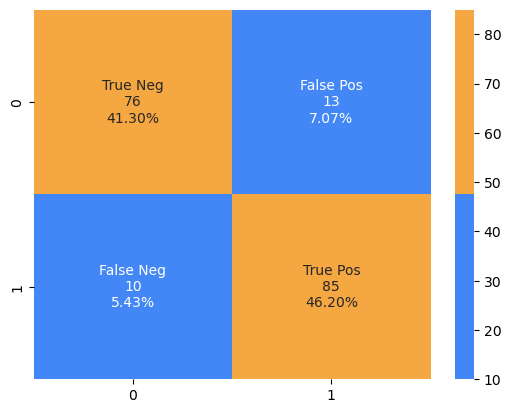

In [37]:
model_evaluation(classifier_svc)

#### 3] Decision Tree Classifier :

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Create a decision tree classifier object with specified parameters
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy: 84.78%
Cross Validation Score: 89.09%
ROC_AUC Score: 84.62%


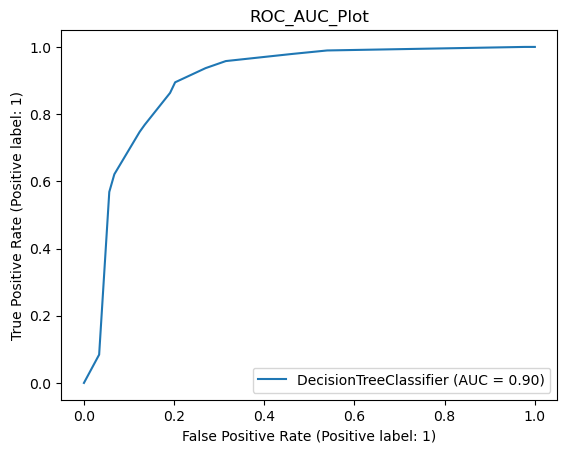

In [40]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



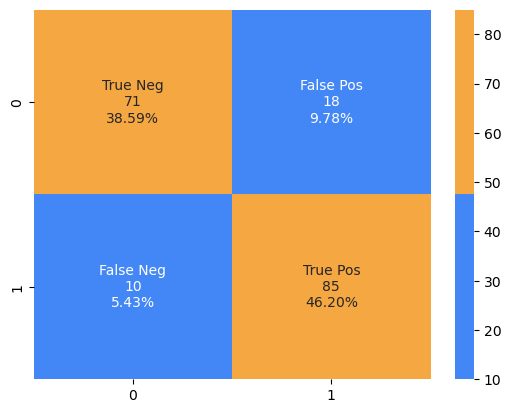

In [41]:
model_evaluation(classifier_dt)

#### 4] Random Forest Classifier :

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Create a random forest classifier object with specified parameters
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy: 84.24%
Cross Validation Score: 92.91%
ROC_AUC Score: 84.06%


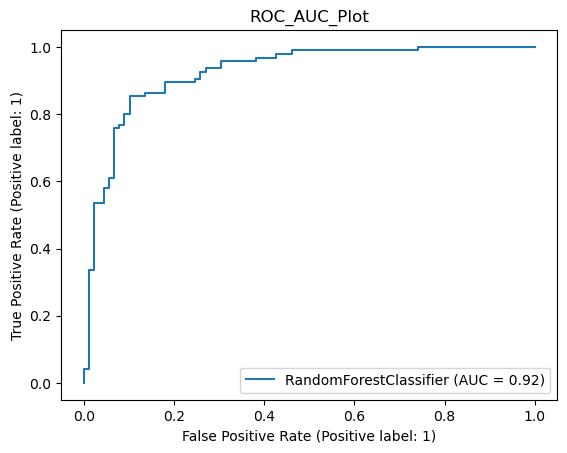

In [44]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



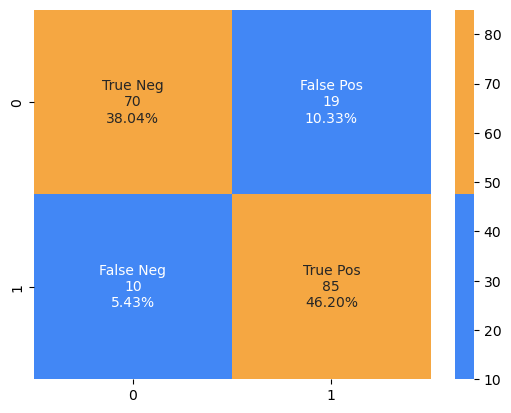

In [45]:
model_evaluation(classifier_rf)

#### 5] K-nearest Neighbors Classifier :

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Create a KNN classifier object with specified parameters
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy: 81.52%
Cross Validation Score: 89.34%
ROC_AUC Score: 81.36%


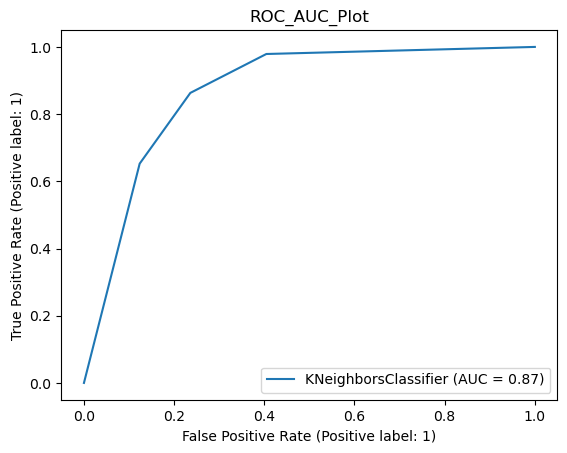

In [48]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



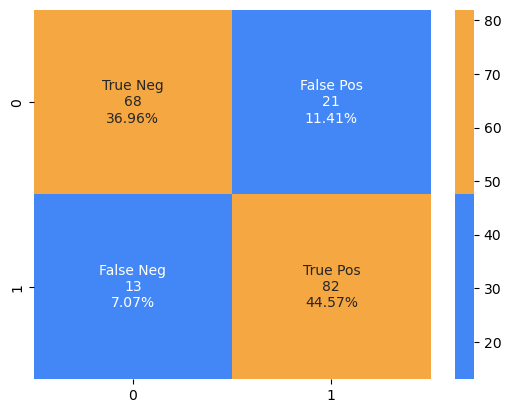

In [49]:
model_evaluation(classifier_knn)

# Conclusion


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|ROC AUC Score|
|-|-|-|-|-|
|1|Logistic Regression|87.50%|91.12%|87.43%|
|2|Support Vector Classifier|87.50%|90.53%|87.43%|
|3|Decision Tree Classifier|84.78%|89.09%|84.62%|
|4|Random Forest Classifier|84.24%|92.91%|84.06%|
|5|K-Nearest Neighbors Classfier|81.52%|89.34%|81.36%|

The table presents a detailed comparison of various machine learning algorithms for predicting heart disease on the given dataset. The performance of each algorithm is evaluated using three key metrics: accuracy, cross-validation score, and ROC AUC score.

Among the algorithms tested, Logistic Regression and Support Vector Classifier demonstrate the highest accuracy, achieving an impressive rate of 87.50%. This indicates that these models accurately predicted the presence or absence of heart disease in approximately 87.50% of the cases.

Cross-validation scores provide an assessment of the algorithm's performance on multiple train-test splits of the dataset. Both Logistic Regression and Support Vector Classifier achieved strong cross-validation scores, with values of 91.12% and 90.53% respectively. These scores reflect the algorithms' ability to generalize well and perform consistently on unseen data.

The ROC AUC score measures the model's ability to distinguish between positive and negative instances. Remarkably, both Logistic Regression and Support Vector Classifier obtained an identical ROC AUC score of 87.43%. This indicates that these algorithms are effective in correctly classifying heart disease cases while minimizing false positives and false negatives.

Moving on to the other algorithms, the Decision Tree Classifier achieved an accuracy of 84.78% and a respectable cross-validation score of 89.09%. Although slightly lower than the top-performing models, it still demonstrates reasonably accurate predictions and satisfactory generalization.

The Random Forest Classifier achieved an accuracy of 84.24%, but it stands out with an exceptional cross-validation score of 92.91%. This ensemble model, which combines multiple decision trees, exhibits strong generalization capabilities and promises robust performance.

The K-Nearest Neighbors Classifier achieved a slightly lower accuracy of 81.52% and a cross-validation score of 89.34%. While it demonstrates a decent level of accuracy, it falls behind the other algorithms in terms of performance.

In conclusion, both Logistic Regression and Support Vector Classifier emerge as the top-performing algorithms for predicting heart disease in this dataset. They exhibit high accuracy, good generalization performance, and effective discrimination between heart disease and non-heart disease cases. However, it is essential to consider additional factors such as computational efficiency, interpretability, and specific requirements when selecting the most suitable algorithm for real-world applications.




